In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import yfinance as yf

/Users/jingjiang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
stock_list=['AAPL','ASML','FDX','ISRG','LMT','PYPL','QCOM']
end=datetime.now()
start=datetime(end.year-1, end.month, end.day)

In [3]:
df_stock=pd.DataFrame()
for stock in stock_list:
    stockData=yf.download(stock, start, end)
    stockData['Ticker']=stock
    df_stock=pd.concat([df_stock, stockData])
df_stock.head()  

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2022-01-18 00:00:00-05:00,171.509995,172.539993,169.410004,169.800003,168.820206,90956700,AAPL
2022-01-19 00:00:00-05:00,170.000000,171.080002,165.940002,166.229996,165.270798,94815000,AAPL
2022-01-20 00:00:00-05:00,166.979996,169.679993,164.179993,164.509995,163.560730,91420500,AAPL
2022-01-21 00:00:00-05:00,164.419998,166.330002,162.300003,162.410004,161.472855,122848900,AAPL
2022-01-24 00:00:00-05:00,160.020004,162.300003,154.699997,161.619995,160.687393,162294600,AAPL


In [4]:
AAPL=df_stock[df_stock['Ticker']=='AAPL']
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,152.956449,155.055754,150.850476,152.994048,152.582750,8.729007e+07
std,13.233854,13.133574,13.260465,13.255778,13.052826,2.382800e+07
min,126.010002,127.769997,124.169998,125.019997,125.019997,3.519590e+07
25%,142.659996,144.914997,140.595001,142.845001,142.608841,7.098640e+07
50%,151.834999,154.180000,149.794998,151.680000,151.399330,8.264010e+07
75%,164.112503,166.382504,162.187496,164.594997,163.711887,9.603402e+07
max,178.550003,179.610001,176.699997,178.960007,178.154053,1.826020e+08


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-01-18 00:00:00-05:00 to 2023-01-18 00:00:00-05:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
 6   Ticker     252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

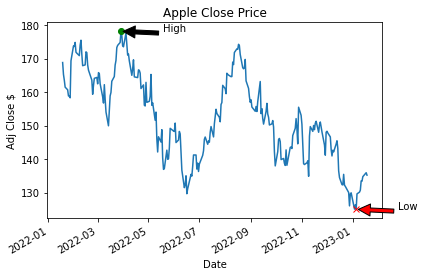

In [6]:
AAPL['Adj Close'].plot()
plt.ylabel("Adj Close $")
plt.title("Apple Close Price")
maxPrice=AAPL['Adj Close'].max()
minPrice=AAPL['Adj Close'].min()
maxDate=AAPL['Adj Close'].idxmax()
minDate=AAPL['Adj Close'].idxmin()
plt.plot(maxDate, maxPrice, color='green', marker='o')
plt.plot(minDate, minPrice, color='red', marker='x')
#plt.annotate("High", xy=(maxDate, maxPrice), 
#             xytext=(maxDate+pd.offsets.YearOffset(-2, month=1), maxPrice),
#             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate("High", xy=(maxDate, maxPrice), 
             xytext=(maxDate+pd.DateOffset(50), maxPrice),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate("Low", xy=(minDate, minPrice), 
             xytext=(minDate+pd.DateOffset(50), minPrice),
                     arrowprops=dict(facecolor='red', shrink=0.05))
plt.show


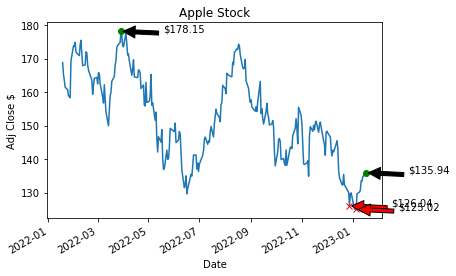

In [7]:
minYear=min(AAPL.index.year)
maxYear=max(AAPL.index.year)
AAPL['Adj Close'].plot()
plt.ylabel('Adj Close $')
plt.title('Apple Stock')
for year in range(minYear, maxYear+1):
    maxPrice=AAPL.loc[str(year)]['Adj Close'].max()
    minPrice=AAPL.loc[str(year)]['Adj Close'].min()
    maxDate=AAPL.loc[str(year)]['Adj Close'].idxmax()
    minDate=AAPL.loc[str(year)]['Adj Close'].idxmin()
    plt.plot(maxDate, maxPrice, color='green', marker='o')
    plt.plot(minDate, minPrice, color='red', marker='x')
    plt.annotate("${:.2f}".format(maxPrice), xy=(maxDate, maxPrice), 
             xytext=(maxDate+pd.DateOffset(50), maxPrice),
             arrowprops=dict(facecolor='black', shrink=0.05))
    plt.annotate("${:.2f}".format(minPrice), xy=(minDate, minPrice), 
             xytext=(minDate+pd.DateOffset(50), minPrice),
                 arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

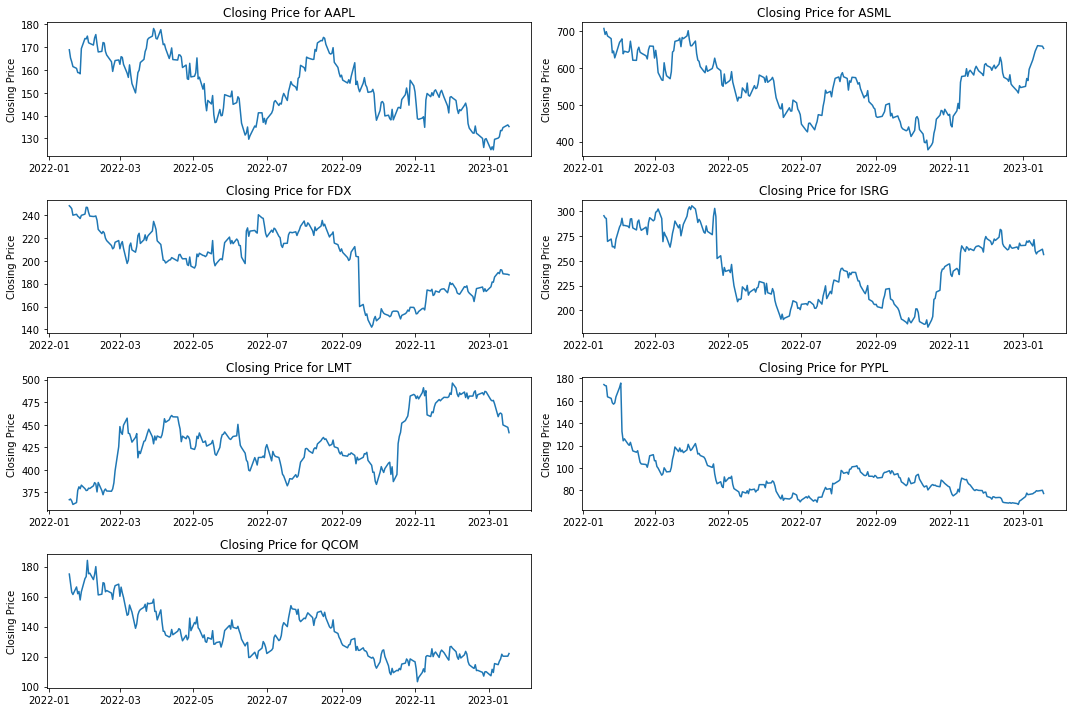

In [8]:
plt.figure(figsize=(15,10))
for i, stock in enumerate(stock_list):
    i=i+1
    df=df_stock[df_stock['Ticker']==stock]
    plt.subplot(4,2,i)
    plt.plot(df.index, df['Adj Close'])
    plt.title(f'Closing Price for {stock}')
    plt.ylabel('Closing Price')
plt.tight_layout()
plt.show()

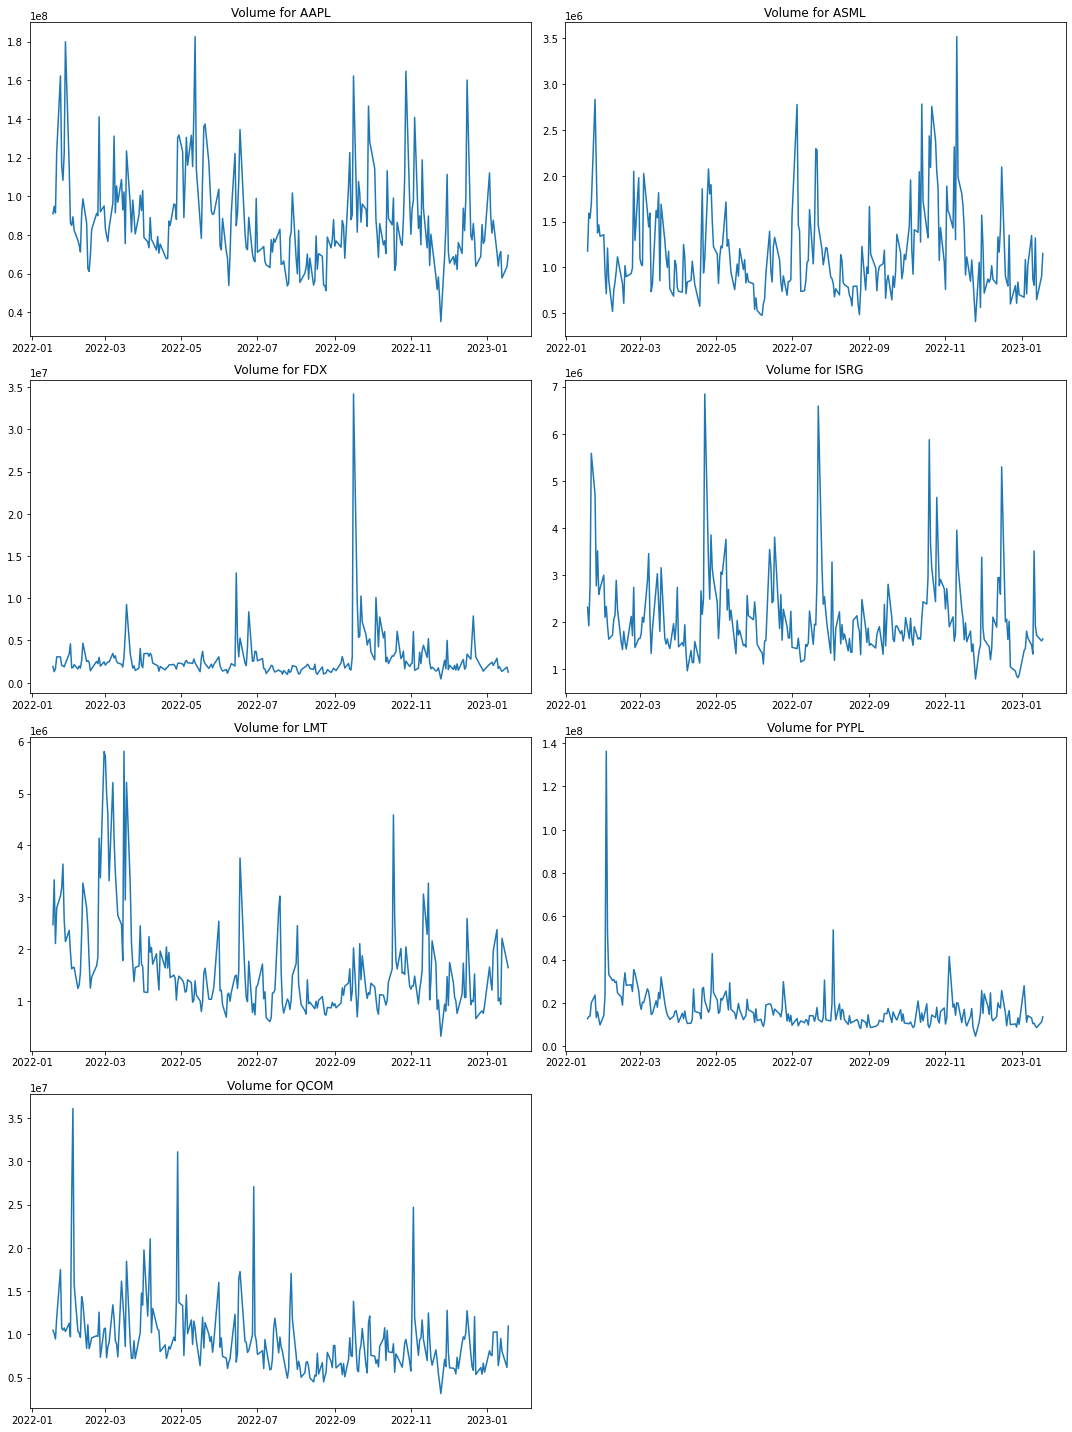

In [9]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, stock in enumerate(stock_list):
    df=df_stock[df_stock['Ticker']==stock]
    plt.subplot(4,2,i+1)
    plt.plot(df.index, df['Volume'])
    plt.title(f'Volume for {stock}')
    plt.ylabel='Trading Volume'
plt.tight_layout()
plt.show()


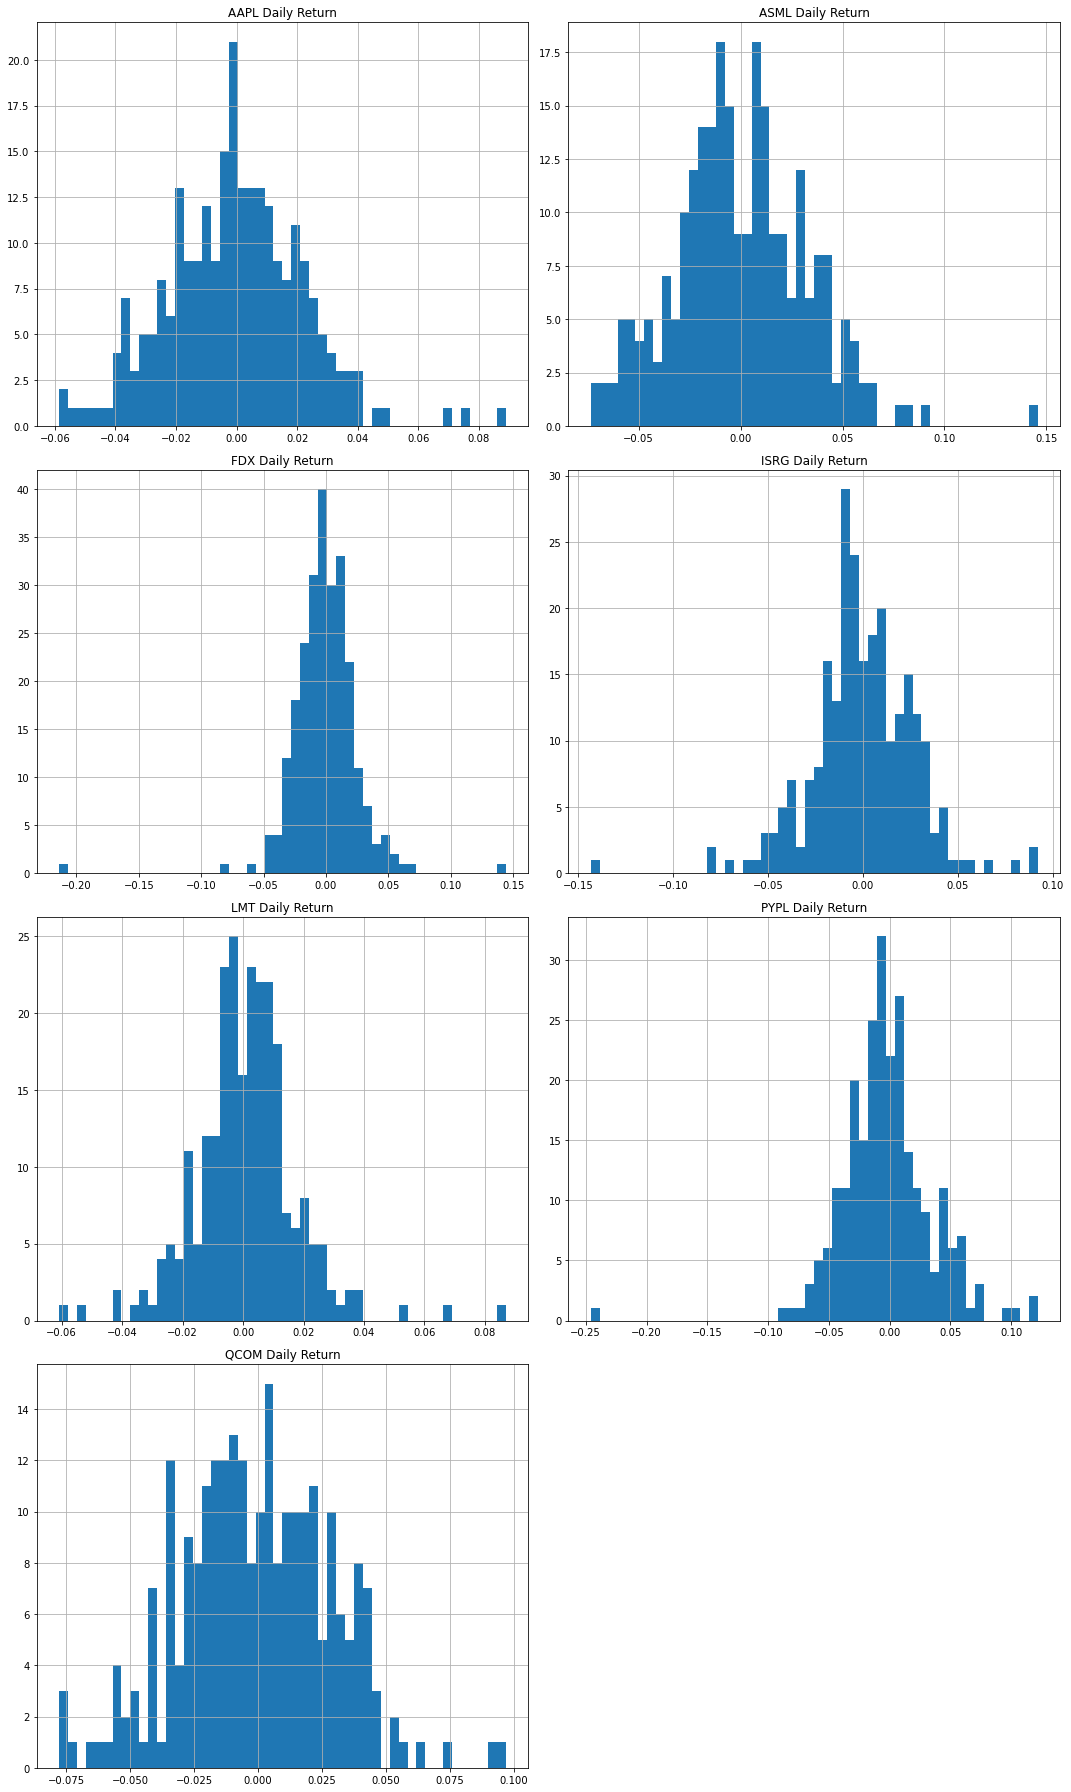

In [11]:
plt.figure(figsize=(15,25))
pd.options.mode.chained_assignment = None  # default='warn'
for i, stock in enumerate(stock_list):
    df=df_stock.loc[df_stock['Ticker']==stock]
    df['Daily Return']=df['Adj Close'].pct_change()
    plt.subplot(4,2,i+1)
    df['Daily Return'].hist(bins=50)
    plt.title(f'{stock} Daily Return')
    plt.ylabel='Count'
    plt.xlabel='Daily Return'
    
plt.tight_layout()
plt.show()

(-0.1, 0.2)

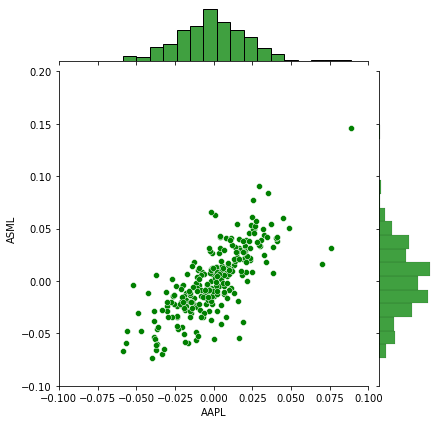

In [12]:
ASML=df_stock.loc[df_stock['Ticker']=='ASML']
df_stock['Daily Return']=df_stock['Adj Close'].pct_change()
df_return=df_stock[['Daily Return','Ticker']].pivot_table(
    'Daily Return', index=df_stock.index, columns='Ticker')
df_price=df_stock[['Adj Close','Ticker']].pivot_table(
    'Adj Close', index=df_stock.index, columns='Ticker')
plot=sns.jointplot(x='AAPL', y='ASML', data=df_return, kind='scatter', color='green')
plot.ax_marg_x.set_xlim(-0.1, 0.1)
plot.ax_marg_y.set_ylim(-0.1, 0.2)

Text(0.5, 1.0, 'Correlation of stock Return')

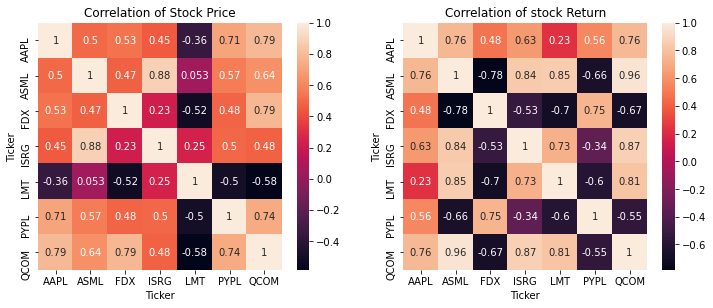

In [13]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.heatmap(df_price.corr(), annot=True)
plt.title('Correlation of Stock Price')
plt.subplot(2,2,2)
sns.heatmap(df_return.corr(), annot=True)
plt.title('Correlation of stock Return')

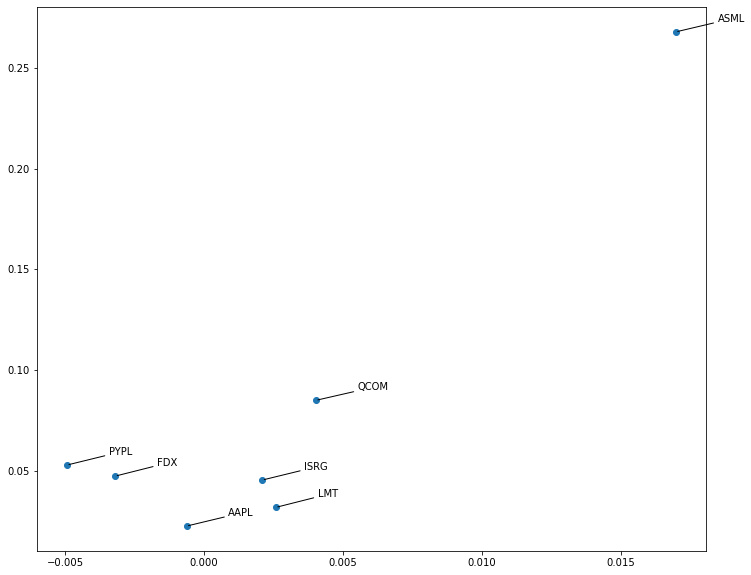

In [14]:
plt.figure(figsize=(12,10))
plt.scatter(df_return.mean(), df_return.std())
plt.xlabel='Average Return'
plt.ylabel='Standard Deviation'
for label, x, y in zip(df_return.columns, df_return.mean(), df_return.std()):
    plt.annotate(label, xy=(x, y), xytext=(x+0.0015, y+0.005),
                 arrowprops=dict(arrowstyle='-', facecolor='black'))


Text(0.5, 1.0, 'Time Series of Stock Price')

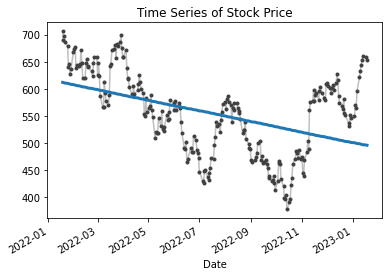

In [15]:
from sklearn.linear_model import LinearRegression
#training data
df=ASML[['Adj Close']]
#add time dummy
df['Time']=np.arange(len(ASML.index))
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'Adj Close']
#train the model
model=LinearRegression()
model.fit(X,y)
#store the fitted value as a time series witht the same time index as the training data
y_pred=pd.Series(model.predict(X), index=X.index)
#plot the fitted value overtime
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
ax=y.plot(**plot_params)
ax=y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Series of Stock Price')

<AxesSubplot:title={'center':'Stock Price 365 Day Moving Average'}, xlabel='Date'>

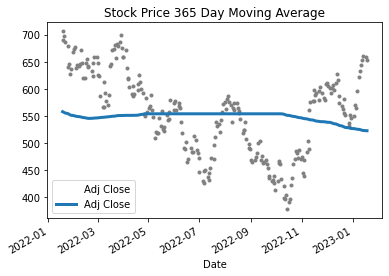

In [16]:
#using moving average to create a trend model
from warnings import simplefilter
simplefilter='ignore' #ignore warnings to clean up output cells
df=ASML[['Adj Close']]
moving_average=df.rolling(
window=365, #365 days window
center=True, #put the average at the center of the window
min_periods=183, #choose half window size
).mean()
ax=df.plot(style='.', color='0.5')
moving_average.plot(ax=ax, linewidth=3, title='Stock Price 365 Day Moving Average')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


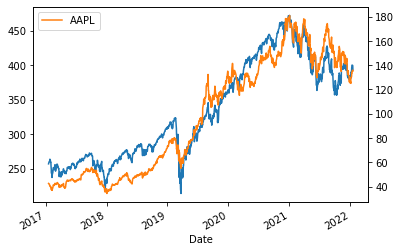

In [19]:
end=datetime.now()
start=datetime(end.year-5, end.month, end.day)
sp500=yf.download('IVV', start, end)
appl=yf.download('AAPL', start, end)
sp500['Adj Close'].plot()
appl['Adj Close'].plot(secondary_y=True)
plt.legend(['AAPL','SP500'])
plt.show()

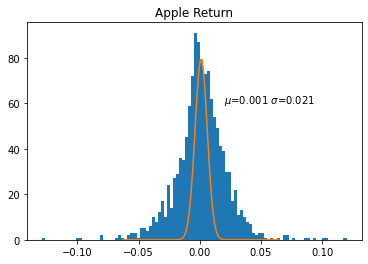

In [20]:
#histogram with density line
from scipy.stats import norm
appl['Return']=appl['Adj Close'].pct_change()
returns=sorted(appl['Return'].dropna().values)
avg=np.mean(returns)
std=np.std(returns)
norm_return=np.linspace(avg-3*std, avg+3*std, 100)
plt.hist(returns, bins=100)
plt.plot(norm_return, norm.pdf(norm_return, avg, 0.005))
plt.annotate('$\mu$=%.3f $\sigma$=%.3f'%(avg, std), xy=(.02, 60))
plt.title('Apple Return')
plt.show()

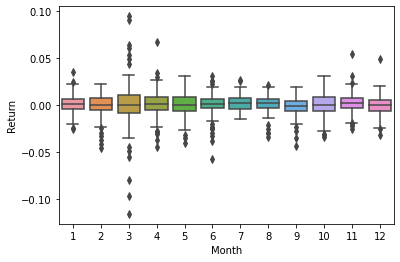

In [21]:
sp500['Month']=sp500.index.month
sp500['Return']=sp500['Adj Close'].pct_change()
sns.boxplot(x=sp500['Month'], y=sp500['Return'], data=sp500)
plt.show()